Decision Tree Classification


Decision Tree is also called as CART - Classification and Regression Treec

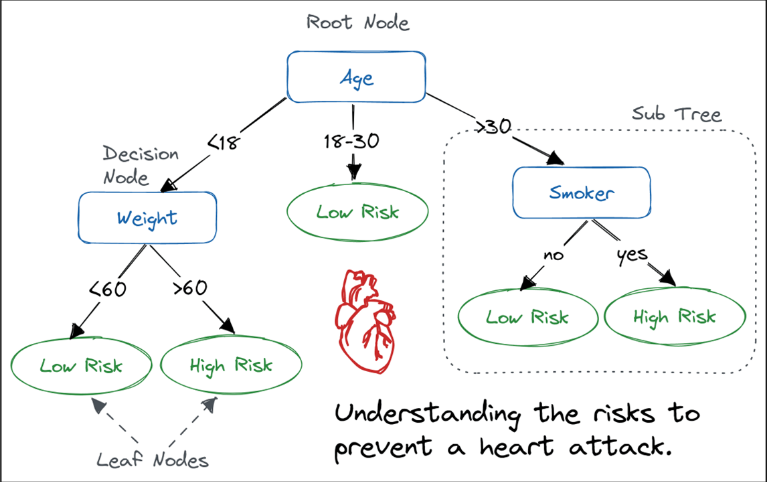

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1 : Read the train dataset

In [3]:
import pandas as pd
df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Step 3: Seperate X and Y(species)

In [12]:
X=df.drop(columns=['species'])
Y=df[['species']]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:

Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [14]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

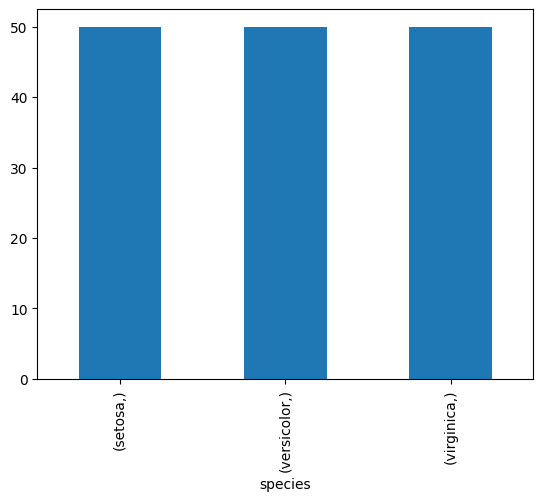

In [15]:
Y.value_counts().plot(kind='bar')

Step 4: Apply Preprocessing on X

In [16]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), 
                         StandardScaler()).set_output(transform='pandas')

In [19]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Step 5: Apply Train Test split

test - 0.33

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, 
                                                test_size=0.33, random_state=42)

In [22]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [23]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [24]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [25]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [27]:
xtrain.shape

(100, 4)

In [28]:
xtest.shape

(50, 4)

Step 6: Model Building

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="entropy"
)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [30]:
model.score(xtrain, ytrain)

0.66

In [31]:
model.score(xtest,ytest)

0.68

Hyperparameter tuning


GridSearchCV

In [32]:
params = {
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_split" : [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion" : ["gini", "entropy"]
}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [35]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [36]:

gscv.best_score_

0.9223826173826174

In [37]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5)

In [38]:
best_dtc.score(xtrain, ytrain)

0.96

In [39]:
best_dtc.score(xtest, ytest)

1.0